In [1]:
import os
import joblib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/home/riri/Desktop/Soiling/datasets/soiling.csv")
df.head()

,client,gender,age,hours_slept,sleep_quality,food_taken,food_amount,drink,temperature(deg),exercise,medication,breakfast_time,lunch_time,supper_time,visit_restroom,times_visited,avg_relieve_time(min),soiled
0,Middleton,Male,6,9,Concerning,Fruits,Normal,Tea,20.1,Yes,No,08:25,13:57,19:03,Yes,1,21,No
1,Samantha,Female,8,6,Good,Chapati,Small,Tea,20.3,No,No,08:15,13:45,18:48,No,0,18,No
2,Butler,Male,9,8,Excellent,Fruits,Small,Soft drink,21.5,Yes,No,08:05,13:30,18:47,No,0,20,Yes
3,Yates,Female,8,6,Good,Meat,Normal,Water,22.5,No,No,08:04,12:42,18:16,No,0,19,No
4,Kelly,Male,9,7,Excellent,Veggies,Heavy,Coffee,22.8,Yes,Yes,09:22,12:44,18:06,No,0,21,Yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28532.0,7.993271,2.011835,-2.0,7.0,8.0,9.0,15.0
hours_slept,28532.0,6.997161,1.042922,3.0,6.0,7.0,8.0,11.0
temperature(deg),28532.0,20.488788,3.532399,7.6,18.1,20.5,22.9,39.1
times_visited,28532.0,1.507605,1.675356,0.0,0.0,0.0,3.0,7.0
avg_relieve_time(min),28532.0,20.004767,2.024034,12.0,19.0,20.0,21.0,28.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28532 entries, 0 to 28531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client                 28532 non-null  object 
 1   gender                 28532 non-null  object 
 2   age                    28532 non-null  int64  
 3   hours_slept            28532 non-null  int64  
 4   sleep_quality          28532 non-null  object 
 5   food_taken             28532 non-null  object 
 6   food_amount            28532 non-null  object 
 7   drink                  28532 non-null  object 
 8   temperature(deg)       28532 non-null  float64
 9   exercise               28532 non-null  object 
 10  medication             28532 non-null  object 
 11  breakfast_time         28532 non-null  object 
 12  lunch_time             28532 non-null  object 
 13  supper_time            28532 non-null  object 
 14  visit_restroom         28532 non-null  object 
 15  ti

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


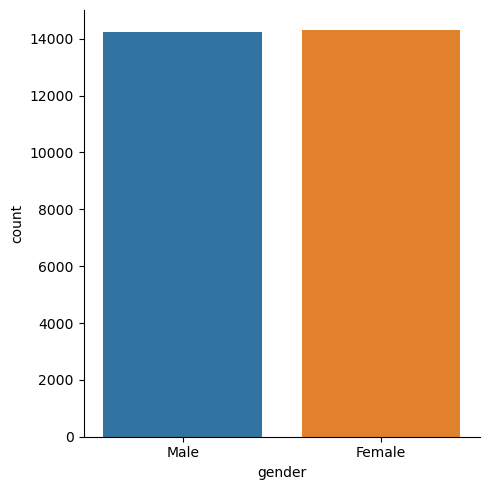

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


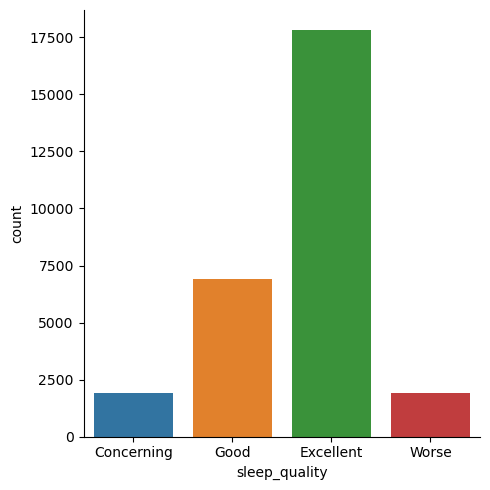

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


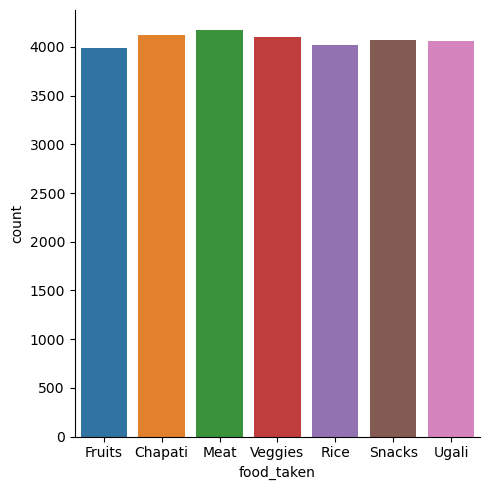

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


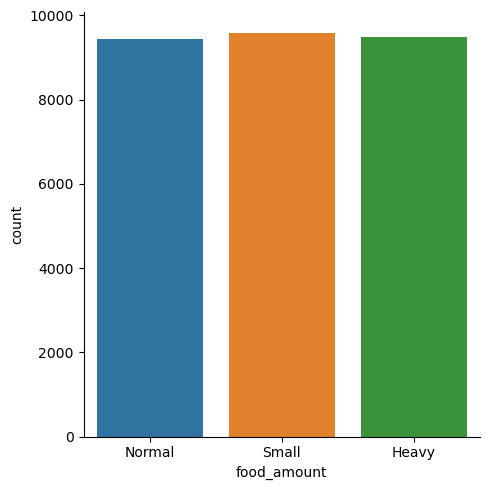

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


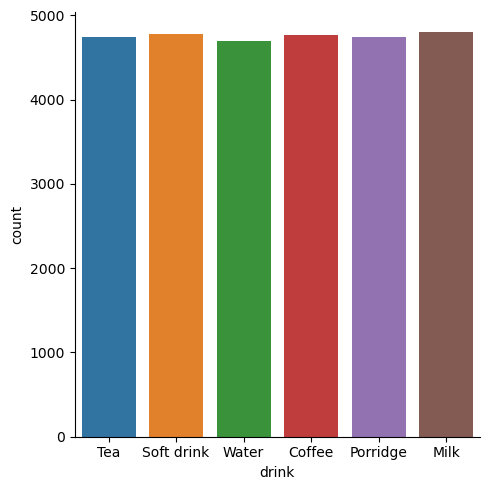

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


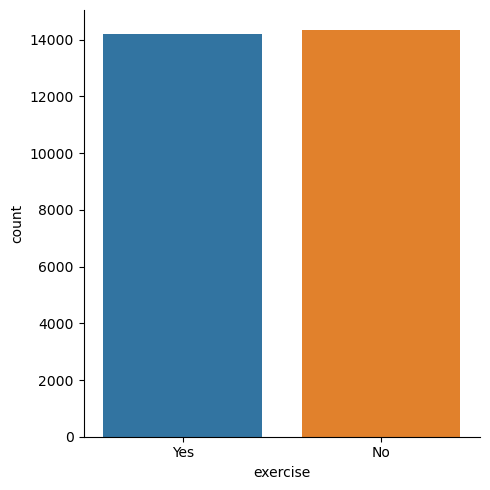

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


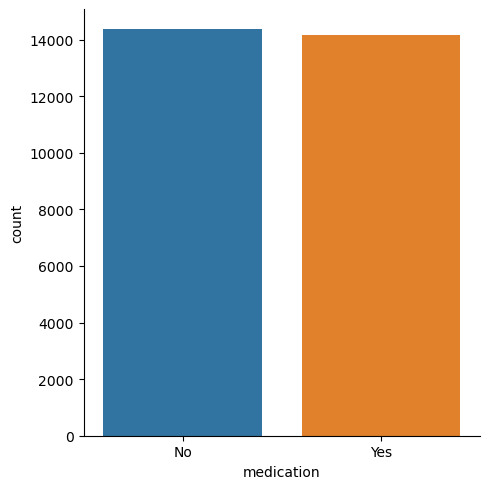

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


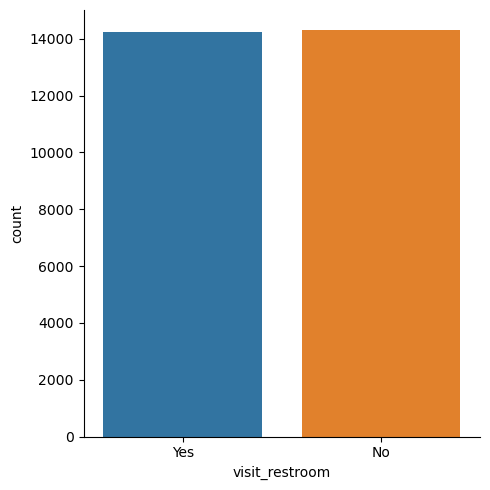

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1251219/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


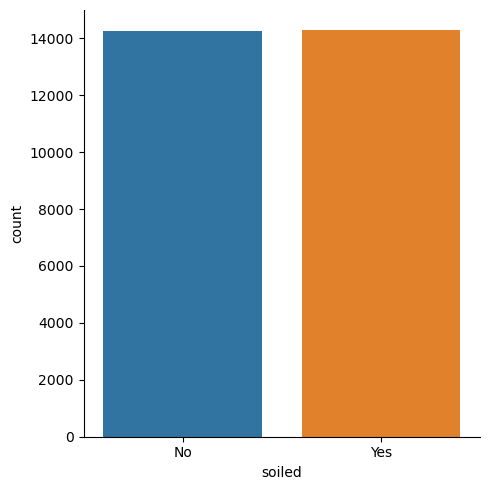

In [5]:
for col in df.select_dtypes(include=['object', 'category']):
    if col not in ['client', 'breakfast_time', 'lunch_time', 'supper_time']:
        sns.catplot(data=df, x=col, kind="count")
        plt.tight_layout()
        plt.show();

In [6]:
X = df.drop(columns=['client', 'breakfast_time', 'lunch_time', 'supper_time', 'soiled'], axis=1)
y = df['soiled']

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def preprocess_inputs(data: pd.DataFrame):
    cat_columns = [col for col in data.select_dtypes(include=['object', 'category'])]
    num_columns = [col for col in data.select_dtypes(include=['int', 'float'])]
    
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False))
    ])
    
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])  
        
    transformer = ColumnTransformer(transformers=[
        ("categorical", cat_pipe, cat_columns),
        ("numerical", num_pipe, num_columns)
    ])
    
    preprocessed = transformer.fit_transform(data)
    
    return preprocessed

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
new_x = preprocess_inputs(X)

X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape

((21399, 33), (7133, 33), (21399,))

In [14]:
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
import numpy as np

def run_classifier(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    scores = []
    
    # kfold = StratifiedKFold()
    
    # for (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    #     X_train, X_test = X[train_idx], 
        
        
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

In [15]:
lr = LogisticRegression()
run_classifier(lr, X_train, y_train, X_test, y_test)

0.4967054535258657

In [16]:
xgb = XGBClassifier()
run_classifier(xgb, X_train, y_train, X_test, y_test)

0.49502313192205244

In [17]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [18]:
xgb.score(X_train, y_train)

0.7261554278237301

In [19]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

          No       0.50      0.48      0.49      3619
         Yes       0.49      0.51      0.50      3514

    accuracy                           0.50      7133
   macro avg       0.50      0.50      0.49      7133
weighted avg       0.50      0.50      0.49      7133



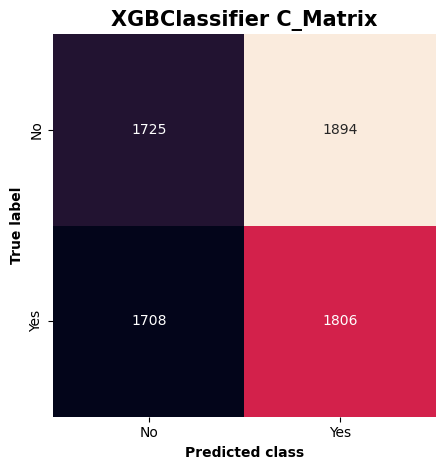

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, cbar=False, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBClassifier C_Matrix", weight='bold', size=15)
plt.xlabel("Predicted class", weight="bold", size=10)
plt.ylabel("True label", weight='bold', size=10)
plt.tight_layout()
plt.show();